# Chapter 3 - Classification Walkthrough: Titanic Dataset

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC,
)
from yellowbrick.model_selection import (
    LearningCurve,
)

### Dataset

The following columns are included in the dataset:

    • pclass - Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
    • survival - Survival (0 = No, 1 = Yes)
    • name - Name
    • sex - Sex
    • age - Age
    • sibsp - Number of siblings/spouses aboard
    • parch - Number of parents/children aboard
    • ticket - Ticket number
    • fare - Passenger fare
    • cabin - Cabin
    • embarked - Point of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    • boat - Lifeboat
    • body - Body identification number
    • home.dest - Home/destination

In [5]:
url = ("https://raw.githubusercontent.com/joanby/python-ml-course/refs/heads/master/datasets/titanic/titanic3.csv")
df = pd.read_csv(url)
orig_df = df
orig_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Clean Data

In [7]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [8]:
df.shape

(1309, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [10]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [11]:
df.describe().iloc[:, :2]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [12]:
# How many NaN are in each column?
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

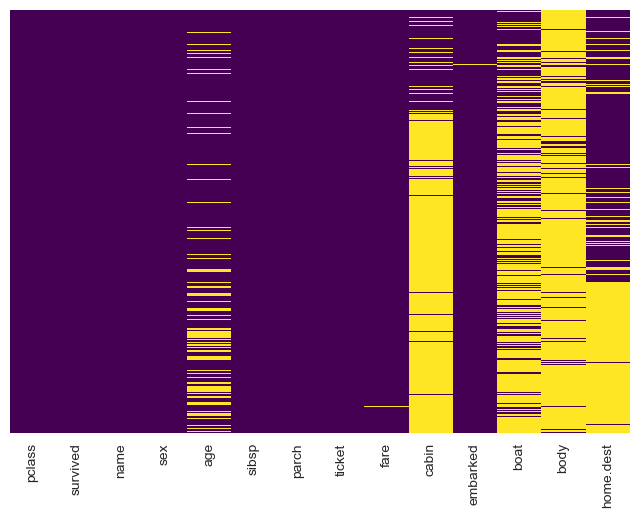

In [13]:
# Heatmap for visualize the missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [14]:
# Create a boolean mask indicating rows in df that contain any NaN values
mask = df.isnull().any(axis=1)

mask.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [15]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
# Display the 'body' column of the first 5 rows in df that contain any NaN values
df[mask].body.head()  

0      NaN
1      NaN
2      NaN
3    135.0
4      NaN
Name: body, dtype: float64

In [17]:
# Count the occurrences of each unique value in the 'sex' column, including NaN values
df.sex.value_counts(dropna=False)    # There are Zero NA's values in column 'sex', but there are other columns with NA's.

sex
male      843
female    466
Name: count, dtype: int64

In [18]:
# Count the occurrences of each unique value in the 'embarked' column, including NaN values
df.embarked.value_counts(dropna=False)  

embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

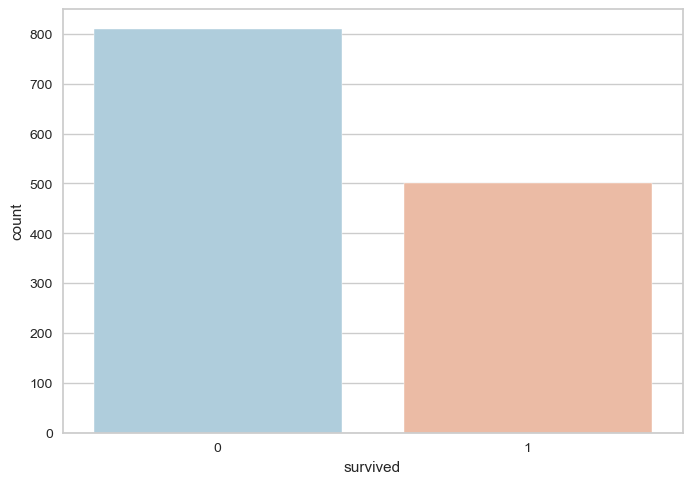

In [19]:
# Style
sns.set_style('whitegrid')

# Visualize 'Survivals' (0 - Not Survive, 1 - Survive)
sns.countplot(x='survived', data=df, hue='survived', palette='RdBu_r', legend=False);

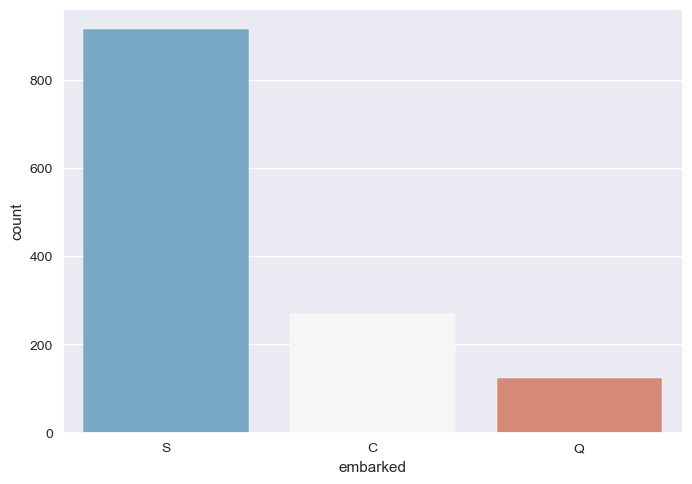

In [20]:
# Style
sns.set_style('darkgrid')

# Visualize 'Survivals' (0 - Not Survive, 1 - Survive)
sns.countplot(x='embarked', data=df, hue='embarked', palette='RdBu_r', legend=False);

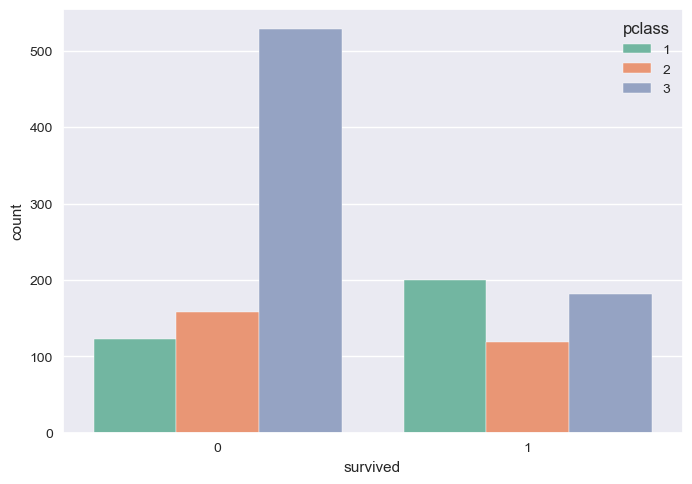

In [21]:
# Split Survivals by 'Passenger Class'
sns.countplot(x='survived', hue='pclass', data=df, palette='Set2');

In [22]:
name = df.name
name.head(10)

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                Anderson, Mr. Harry
6                  Andrews, Miss. Kornelia Theodosia
7                             Andrews, Mr. Thomas Jr
8      Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                            Artagaveytia, Mr. Ramon
Name: name, dtype: object

In [23]:
df2 = df.drop(columns=["name","ticket","home.dest","boat","body","cabin"])
df2.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [24]:
# Convert categorical variables in df2 into dummy/indicator variables for each category
df2 = pd.get_dummies(df2)
df2.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,True,False,False,False,True
1,1,1,0.9167,1,2,151.5500,False,True,False,False,True
2,1,0,2.0000,1,2,151.5500,True,False,False,False,True
3,1,0,30.0000,1,2,151.5500,False,True,False,False,True
4,1,0,25.0000,1,2,151.5500,True,False,False,False,True


In [25]:
df2 = df2.drop(columns=["sex_male", "embarked_C"])
df2.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,True,False,True
1,1,1,0.9167,1,2,151.5500,False,False,True
2,1,0,2.0000,1,2,151.5500,True,False,True
3,1,0,30.0000,1,2,151.5500,False,False,True
4,1,0,25.0000,1,2,151.5500,True,False,True


In [26]:
# Transform the specified boolean columns into zeros and ones
df2[["sex_female", "embarked_Q", "embarked_S"]] = df2[["sex_female", 
                                                       "embarked_Q", 
                                                       "embarked_S"]].astype(int)  # Convert boolean columns to integers (0s and 1s)
df2.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,0,1
1,1,1,0.9167,1,2,151.5500,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,1
3,1,0,30.0000,1,2,151.5500,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,1


In [27]:
y = df2.survived
X = df2.drop(columns="survived")

### Sample Data

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3, 
                                                                    random_state=42)

In [30]:
# The IterativeImputer class

from sklearn.experimental import enable_iterative_imputer
from sklearn import impute

num_cols = ["pclass", "age", "sibsp", "parch", "fare", "sex_female"]  # List of numeric columns to be imputed

imputer = impute.IterativeImputer()                 # Initialize an IterativeImputer for imputing missing values in the dataset

imputed = imputer.fit_transform(X_train[num_cols])  # Fit the imputer on the numeric columns of X_train and transform them

X_train.loc[:, num_cols] = imputed                  # Replace the original numeric columns in X_train with the imputed values

imputed = imputer.transform(X_test[num_cols])       # Apply the same transformation to the numeric columns of X_test

X_test.loc[:, num_cols] = imputed                   # Replace the original numeric columns in X_test with the imputed values

In [31]:
X_train.isna().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
embarked_Q    0
embarked_S    0
dtype: int64

```Python
# Traditional form: Fill NA's with median

meds = X_train.median()
X_train = X_train.fillna(meds)
X_test = X_test.fillna(meds)

# How many NaN are in each column?
X_train.isna().sum()

### Normalize Data

In [34]:
# Manually assign column names to X_train and X_test
X_train.columns = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'embarked_Q', 'embarked_S']
X_test.columns = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'embarked_Q', 'embarked_S']

# Select columns to normalize
cols = ['pclass', 'age', 'sibsp', 'fare']

sca = preprocessing.StandardScaler()

# Fit and transform only the specified columns
X_train[cols] = sca.fit_transform(X_train[cols])  # Fit and transform the selected columns in X_train
X_test[cols] = sca.transform(X_test[cols])        # Transform the selected columns in X_test

# Now X_train contain normalized values for the specified columns
X_train.head()  # Check the first few rows of X_train

,pclass,age,sibsp,parch,fare,sex_female,embarked_Q,embarked_S
1214,0.825248,-0.128878,-0.498616,0,-0.473599,0,0,1
677,0.825248,-0.205639,-0.498616,0,-0.488120,0,0,1
534,-0.363317,-0.751431,-0.498616,0,-0.145224,1,0,1
1174,0.825248,-2.198733,6.897852,2,0.679618,1,0,1
864,0.825248,-0.049698,-0.498616,0,-0.490408,1,0,1


In [35]:
def tweak_titanic(df):
    
    # Drop unnecessary columns from the DataFrame that are irrelevant for analysis
    df = df.drop(
        columns=[
            "name",         # Drop 'name' column as it's not useful for modeling
            "ticket",       # Drop 'ticket' column as it's a unique identifier and not helpful for prediction
            "home.dest",    # Drop 'home.dest' column as it's not relevant for prediction
            "boat",         # Drop 'boat' column as it's only available for survivors
            "body",         # Drop 'body' column as it's only available for deceased passengers
            "cabin",        # Drop 'cabin' column due to a large number of missing values
        ]
    ).pipe(pd.get_dummies,  # Convert categorical variables into dummy variables,
           drop_first=True) # Dropping the first category to avoid multicollinearity
    
    return df               # Return the modified DataFrame

In [36]:
def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    # Separate the target variable (y) and the feature set (X) from the DataFrame
    y = df[y_col]               # Extract the target column from the DataFrame
    X = df.drop(columns=y_col)  # Drop the target column from the feature set

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42  # Split the dataset with a test size of 'size' and a fixed random state for reproducibility
    )

    cols = X.columns  # Store all the feature column names

    # List of numerical columns that may need imputation or transformation
    num_cols = [
        "pclass",  # Passenger class
        "age",     # Age of the passenger
        "sibsp",   # Number of siblings/spouses aboard
        "parch",   # Number of parents/children aboard
        "fare",    # Fare paid for the ticket
    ]

    # Apply imputation on numerical columns using IterativeImputer
    fi = impute.IterativeImputer()                                                 # Initialize the iterative imputer
    fitted = fi.fit_transform(X_train[num_cols])                                   # Fit the imputer on the training data and transform it
    X_train = X_train.assign(**{c: fitted[:, i] for i, c in enumerate(num_cols)})  # Replace missing values in the training data with imputed values

    test_fit = fi.transform(X_test[num_cols])                                      # Apply the same transformation to the test data
    X_test = X_test.assign(**{c: test_fit[:, i] for i, c in enumerate(num_cols)})  # Replace missing values in the test data with imputed values

    # Apply standardization if specified
    if std_cols:  # If standardization columns are provided
        std = preprocessing.StandardScaler()                                           # Initialize the StandardScaler
        fitted = std.fit_transform(X_train[std_cols])                                  # Fit and transform the training data on specified columns
        X_train = X_train.assign(**{c: fitted[:, i] for i, c in enumerate(std_cols)})  # Replace the training data with standardized values
        test_fit = std.transform(X_test[std_cols])                                     # Apply the same transformation to the test data
        X_test = X_test.assign(**{c: test_fit[:, i] for i, c in enumerate(std_cols)})  # Replace the test data with standardized values

    # Return the processed training and testing datasets
    return X_train, X_test, y_train, y_test  # Return the train/test splits for X and y

In [37]:
# Apply the tweak_titanic function to the original DataFrame to drop unnecessary columns and convert categorical variables into dummy variables
ti_df = tweak_titanic(orig_df)  

std_cols = ['pclass', 'age', 'sibsp', 'fare']  # Define a list of columns that will be standardized

# Split the tweaked DataFrame into training and testing sets
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df,                  # Use the processed Titanic DataFrame (ti_df) as the feature data
    "survived",             # Specify 'survived' as the target variable (y) to predict
    std_cols=std_cols       # Pass the list of columns (std_cols) that need to be standardized
)

### Baseline Model

In [39]:
from sklearn.dummy import DummyClassifier  # Import DummyClassifier for creating a simple baseline model

bm = DummyClassifier()    # Initialize the DummyClassifier (uses simple strategies like predicting the most frequent class)
bm.fit(X_train, y_train)  # Fit the DummyClassifier on the training data (X_train and y_train)
bm.score(X_test, y_test)  # Evaluate the model on the test data and return the accuracy score

0.5699745547073791

In [40]:
y_test.value_counts()  # Check the distribution of the target in the test set

survived
0    224
1    169
Name: count, dtype: int64

### Various Families

In [42]:
X = pd.concat([X_train, X_test])  # Concatenate the training and testing features into a single dataset
y = pd.concat([y_train, y_test])  # Concatenate the training and testing labels into a single target set

In [43]:
from sklearn import model_selection 
from sklearn.dummy import DummyClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier  
import xgboost  

# Iterate over multiple classification models to evaluate them using cross-validation
for model in [
    DummyClassifier,         # Baseline model
    LogisticRegression,      # Logistic Regression
    DecisionTreeClassifier,  # Decision Tree Classifier
    KNeighborsClassifier,    # K-Nearest Neighbors
    GaussianNB,              # Naive Bayes
    SVC,                     # Support Vector Classifier
    RandomForestClassifier,  # Random Forest
    xgboost.XGBClassifier,   # XGBoost Classifier
]:
    cls = model()                                   # Initialize the model instance
    kfold = model_selection.KFold(                  # Set up 10-fold cross-validation
        n_splits=10, shuffle=True, random_state=42  # Enable shuffling with a fixed random state
    )
    # Perform cross-validation and compute the ROC AUC score for each fold
    s = model_selection.cross_val_score(
        cls, X, y, scoring="roc_auc", cv=kfold      # Use ROC AUC as the evaluation metric
    )
    # Print the average AUC score and standard deviation for the current model
    print(
        f"{model.__name__:22}  AUC: "
        f"{s.mean():.3f} STD: {s.std():.2f}"
    )

DummyClassifier         AUC: 0.500 STD: 0.00
LogisticRegression      AUC: 0.840 STD: 0.04
DecisionTreeClassifier  AUC: 0.759 STD: 0.03
KNeighborsClassifier    AUC: 0.829 STD: 0.02
GaussianNB              AUC: 0.811 STD: 0.05
SVC                     AUC: 0.838 STD: 0.03
RandomForestClassifier  AUC: 0.845 STD: 0.02
XGBClassifier           AUC: 0.853 STD: 0.02


### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier  # Import StackingClassifier from scikit-learn

# Create a list of classifiers for stacking
clfs = [
    LogisticRegression(),         # Logistic Regression
    DecisionTreeClassifier(),     # Decision Tree Classifier
    KNeighborsClassifier(),       # K-Nearest Neighbors
    GaussianNB(),                 # Naive Bayes
    SVC(probability=True),        # Support Vector Classifier (ensure probability=True for AUC calculation)
    RandomForestClassifier(),     # Random Forest Classifier
]

# Set up the StackingClassifier with base classifiers and a meta-classifier
stack = StackingClassifier(
    estimators=[('lr', clfs[0]), ('dt', clfs[1]), ('knn', clfs[2]), 
                ('nb', clfs[3]), ('svc', clfs[4]), ('rf', clfs[5])],  # Base classifiers
    final_estimator=LogisticRegression(),  # Logistic Regression as the meta-classifier
    cv=5  # Use cross-validation within the stacking model itself
)

# Set up 10-fold cross-validation with shuffle enabled
kfold = model_selection.KFold(
    n_splits=10, shuffle=True, random_state=42  # Enable shuffle with a fixed random state for reproducibility
)

# Perform cross-validation and calculate ROC AUC score
s = model_selection.cross_val_score(
    stack, X, y, scoring="roc_auc", cv=kfold  # Use ROC AUC as the evaluation metric for the stacked model
)

# Print the mean AUC score and standard deviation
print(
    f"{stack.__class__.__name__}  AUC: {s.mean():.3f}  STD: {s.std():.2f}"
)

The StackingClassifier achieved an AUC score of 0.863, which shows strong performance in distinguishing between the two classes, and a standard deviation of 0.02, indicating stable and reliable results across the cross-validation folds.

### Create Model

In [ ]:
rf = ensemble.RandomForestClassifier(  # Initialize a Random Forest Classifier
    n_estimators=100,                  # Use 100 trees in the forest
    random_state=42                    # Set a fixed random state for reproducibility
)

rf.fit(X_train, y_train)  # Fit the Random Forest model to the training data (X_train, y_train)

### Evaluate Model

In [ ]:
# Calculate the accuracy of the Random Forest model on the test set (X_test, y_test)
acc = rf.score(X_test, y_test)  

print("Accuracy:", round(acc,4))

In [ ]:
from sklearn import metrics

# Calculate the precision score
precision = metrics.precision_score(  
    y_test,               # Actual target values from the test set
    rf.predict(X_test)    # Predicted target values from the Random Forest model
)

# Print the precision score rounded to 4 decimal places
print("Precision:", round(precision, 4))

A nice benefit of tree-based models is that you can inspect the feature importance. The feature importance tells you how
much a feature contributes to the model. Note that removing a feature doesn’t mean that the score will go down accordingly, as
other features might be colinear (in this case we could remove either the sex_male or sex_female column as they have a perfect negative correlation):

In [ ]:
# The feature importance

for col, val in sorted(            # Iterate over the top 5 features sorted by their importance
    zip(                           # Combine feature names (columns) with their corresponding importance values
        X_train.columns,           # Feature names from the training set
        rf.feature_importances_,   # Feature importance scores from the trained Random Forest model
    ),
    key=lambda x: x[1],            # Sort the features by their importance scores (x[1] represents the importance value)
    reverse=True,                  # Sort in descending order so that the most important features come first
)[:5]:                             # Limit the output to the top 5 most important features
    print(f"{col:10}{val:10.3f}")  # Print the feature name and its importance score, formatted to 3 decimal places

The feature importance is calculated by looking at the error
increase. If removing a feature increases the error in the model,
the feature is more important.

### Optimize Model

In [ ]:
rf4 = ensemble.RandomForestClassifier()  # Initialize a new Random Forest Classifier

# Correct the parameter grid
params = {
    "max_features": [0.4, "sqrt"],  # Use a valid float (0.4) and "sqrt" instead of "auto"
    "n_estimators": [15, 200],      # Vary the number of trees in the forest
    "min_samples_leaf": [1, 0.1],   # Use 1 for an integer value, and 0.1 for a fraction of samples
    "random_state": [42],           # Keep the random state fixed for reproducibility
}

# Perform grid search with cross-validation
cv = model_selection.GridSearchCV(
    rf4, params, n_jobs=-1          # Use all available processors
).fit(X_train, y_train)

# Print the best parameters found during the grid search
print(cv.best_params_)

In [ ]:
# Testing not the optimal parameters

rft = ensemble.RandomForestClassifier(
    **{
        "max_features": "sqrt",   # Use "sqrt" instead of "auto" (valid value for RandomForestClassifier)
        "min_samples_leaf": 0.1,  # Use 1 for the minimum fraction of samples required to be a leaf node
        "n_estimators": 15,       # Use 200 trees in the forest
        "random_state": 42,       # Set random state for reproducibility
    }
)

# Fit the model on the training data
rft.fit(X_train, y_train)

# Evaluate the model's performance on the test data
rft.score(X_test, y_test)  # Return the accuracy score

In [ ]:
# using optimal parameters

rf5 = ensemble.RandomForestClassifier(
    **{
        "max_features": 0.4,      # Use "sqrt" instead of "auto" (valid value for RandomForestClassifier)
        "min_samples_leaf": 1,    # Use 1 for the minimum fraction of samples required to be a leaf node
        "n_estimators": 200,      # Use 200 trees in the forest
        "random_state": 42,       # Set random state for reproducibility
    }
)

# Fit the model on the training data
rf5.fit(X_train, y_train)

# Evaluate the model's performance on the test data
rf5.score(X_test, y_test)  # Return the accuracy score

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix  

y_pred = rf5.predict(X_test)      # Use the trained Random Forest model (rf5) to make predictions on the test data (X_test)
confusion_matrix(y_test, y_pred)  # Generate a confusion matrix comparing the true labels (y_test) with the predicted labels (y_pred)

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['died', 'survived'], yticklabels=['died', 'survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

# Create a new ConfusionMatrix visualizer and refit the model inside it
cm_viz = ConfusionMatrix(
    RandomForestClassifier(max_features= 0.4,    # Use "sqrt" instead of "auto" (valid value for RandomForestClassifier)
                           min_samples_leaf= 1,  # Use 1 for the minimum fraction of samples required to be a leaf node
                           n_estimators= 200,    # Use 200 trees in the forest
                           random_state= 42),    # Initialize a new Random Forest classifier
    classes=["died", "survived"],                # Specify class labels
)

cm_viz.fit(X_train, y_train)  # Fit the model on the training data
cm_viz.score(X_test, y_test)  # Score on the test data and generate the confusion matrix
cm_viz.poof();                # Display the confusion matrix visualization

### ROC Curve

In [ ]:
y_pred = rf5.predict(X_test)   # Use the trained Random Forest model (rf5) to make predictions on the test set (X_test)
roc_auc_score(y_test, y_pred)  # Calculate the ROC AUC score by comparing the true labels (y_test) with the predicted labels (y_pred)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = rf5.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='blue')

# Plot a diagonal line for reference (representing random guessing)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

### Learning Curve

A learning curve is used to tell us if we have enough training
data. It trains the model with increasing portions of the data
and measures the score. If the cross-validation
score continues to climb, then we might need to invest in gathering more data. 

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6)) # Create a figure and axes for the plot with a size of 6x4 inches
cv = StratifiedKFold(12)               # Set up StratifiedKFold cross-validation with 12 folds to preserve class proportions
sizes = np.linspace(0.3, 1.0, 10)      # Generate 10 evenly spaced training sizes from 30% to 100% of the data

# Create a LearningCurve visualizer with the Random Forest model (rf5)
lc_viz = LearningCurve(
    rf5,                   # The model to be evaluated
    cv=cv,                 # Use StratifiedKFold cross-validation
    train_sizes=sizes,     # Training set sizes to use for plotting the learning curve
    scoring="f1_weighted", # Use weighted F1 score as the evaluation metric
    n_jobs=4,              # Use 4 parallel jobs for computation
    ax=ax,                 # Plot the learning curve on the previously created axes
)

lc_viz.fit(X, y) # Fit the learning curve visualizer with the entire dataset (X, y)
lc_viz.poof();   # Display the learning curve plot

#### The learning curve you provided offers the following insights:

1. Training Score (Blue Line):

The training score is consistently high (around 0.98-1.00), indicating that the model fits the training data very well.
This near-perfect performance suggests that the model may be overfitting to the training data because it performs extremely well on the training set, but this doesn't necessarily reflect the model's ability to generalize to new data.

2. Cross-Validation Score (Green Line):

The cross-validation score is significantly lower than the training score, hovering around 0.75-0.80.
This gap between the training score and cross-validation score indicates that the model is struggling to generalize to unseen data. This is a common sign of overfitting.

3. Trend Analysis:

The training score remains high regardless of the number of training instances, which suggests that adding more data has little impact on improving training performance.
The cross-validation score increases slightly with more training data but shows limited improvement overall. This means that while the model benefits from more data, it may not solve the overfitting issue entirely.

#### Conclusion:
**Overfitting**: The large gap between the training score and cross-validation score strongly indicates that the model is overfitting to the training data. It performs very well on the training set but struggles on the cross-validation (test) set.

**Limited Improvement with More Data**: While adding more data improves the cross-validation score slightly, the model's generalization remains suboptimal. You may need to consider tuning hyperparameters, reducing the model's complexity (e.g., limiting the depth of trees in the Random Forest), or trying other techniques like regularization.

**In summary**, the model is fitting the training data too closely and not generalizing well to new data, as shown by the performance gap between the training and validation sets.

### Deploy Model

Using Python’s pickle module, we can persist models and load
them. Once we have a model, we call the .predict method to
get a classification or regression result:

In [ ]:
import pickle 

pic = pickle.dumps(rf5)       # Serialize (pickle) the trained Random Forest model (rf5) into a byte stream
rf6 = pickle.loads(pic)       # Deserialize (unpickle) the byte stream back into a Random Forest model object (rf6)
y_pred = rf6.predict(X_test)  # Use the deserialized model (rf6) to make predictions on the test data (X_test)
roc_auc_score(y_test, y_pred) # Calculate the ROC AUC score using the true labels (y_test) and predicted labels (y_pred)

Using Flask to deploy a web service for prediction is very com‐
mon. There are now other commercial and open source prod‐
ucts coming out that support deployment. Among them are
Clipper, Pipeline, and Google’s Cloud Machine Learning
Engine.